In [1]:
# !pip install Pillow
# ! pip install wordcloud

In [2]:
import re
import os
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
from datetime import datetime
from collections import Counter
from collections import Counter
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from konlpy.tag import Okt  # 한글 텍스트 분석을 위해 Konlpy 사용

In [3]:
options = Options()
options.add_experimental_option("detach", True)
service = Service(ChromeDriverManager().install())
# driver = webdriver.Chrome(service=service, options=options)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()
# url = "https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EC%9E%AC%ED%99%9C%EC%9A%A9"
url = "https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=%EB%B6%84%EB%A6%AC%EC%88%98%EA%B1%B0&oquery=%EC%9E%AC%ED%99%9C%EC%9A%A9&tqi=iDSZjlqpts0sstjmlBwssssst78-447760"

driver.get(url)
time.sleep(3)

In [4]:
# 해당 요소 찾을때 까지 10초대기
def time_wait(num, code):
    try:
        wait = WebDriverWait(driver, num).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, code)))
    except:
        print(code, '태그를 찾지 못하였습니다.')
        driver.quit()
    return wait


# frame 변경 메소드
def switch_frame(frame):
    driver.switch_to.default_content()  # frame 초기화
    driver.switch_to.frame(frame)  # frame 변경


# 페이지 다운
def page_down(num):
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    body.click()
    for i in range(num):
        body.send_keys(Keys.PAGE_DOWN)
    # 현재 스크래핑된 HTML 요소 스냅샷 만드는 함수


def save_html_snapshot(page_str, file_prefix):
    current_date = datetime.now().strftime('%y%m%d_%H%M%S')

    # 파일 경로 생성
    file_path = f'{file_prefix}_{current_date}.html'

    if not os.path.exists(file_path):
        # HTML을 문자열로 변환
        # html_string = str(soup.prettify())

        # # 부모-자식 관계에 따라 인덴테이션 적용하여 저장
        # with open(file_path, 'w', encoding='utf-8') as file:
        #    # HTML을 보기 좋게 정리하여 문자열로 변환
        #     pretty_html = soup.prettify()
        soup = BeautifulSoup(page_str, 'html.parser')
        # 파일에 저장
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(soup.prettify())
            # file.write(html_string)

        print("HTML 파일이 저장되었습니다.")

In [5]:
save_html_snapshot(driver.page_source,"첫 페이지")

HTML 파일이 저장되었습니다.


In [6]:
# 해당 요소를 찾을때 까지 10초 대기
time_wait(10, 'div#main_pack > section._prs_blg > div.api_subject_bx > ul')
# (1) 검색창 찾기
search = driver.find_element(By.CSS_SELECTOR, 'div#main_pack > section._prs_blg > div.api_subject_bx > ul')
sleep(3)
# print(search)

In [7]:
def scroll_and_collect(driver, target_count=800):
    collected_items = []
    last_height = driver.execute_script("return document.body.scrollHeight")

    while len(collected_items) < target_count:
        # 스크롤 다운
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        # 새로운 내용이 로드될 때까지 대기
        time.sleep(3)
        
        # 새로 로드된 게시물들을 수집
        items = driver.find_elements(By.CSS_SELECTOR, 'ul.lst_view > li.bx')  # 게시물 선택자
        
        # 중복되지 않는 게시물만 수집 리스트에 추가
        for item in items:
            if item not in collected_items:
                collected_items.append(item)

        # 현재 높이와 마지막 높이를 비교하여 변화가 없으면 멈춤
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height
    
    return collected_items[:target_count]

collected_items = scroll_and_collect(driver, target_count=100)

In [8]:
for index, item in enumerate(collected_items):
    print(f"Post {index + 1}: {item.text}")

Post 1: 문서 저장하기
블링유에
인플루언서
3일 전
재활용 쓰레기 분리수거함 빨래통 이즈리빙 수납정리함 설치
한눈에 쉽게 알아볼 수 있어서 쓰레기 분리 투입할 때 편합니다. 그리고 박스 2개 구매 이상 구매하면 전용 비닐봉지(10장)이 제공되어서 좋았습니다. 물론 비닐봉지 없이 사용해도 되기는 한데요. 저는 비닐봉지에 담아서 를 하기 때문에 맞는 사이즈의 봉투를 구입하려고 알아보고 있었거든요. 그런데 이렇게 챙겨서 보내 주니깐 좋더라고요. 비닐은 내통에 넣고...
20
재활용 분리수거함 가정용 대용량 비숨 3단으로 정리
Post 2: 문서 저장하기
피노로그
인플루언서
5일 전
아이스팩 버리는법 주민센터 수거함 재활용 분리수거 버리기
주민센터 아이스팩 분리수거함 아마 가까운 관할 주민센터, 행정복지센터 방문하시면 입구에 수거함을 비치해둔걸 보신적 있으실거에요. 잘 모아두었다가 외출하실때 한번씩 챙겨가셔서 배출해주시면 됩니다. 보통 건전지, 의약품, 아이스팩 수거함이 주민센터 앞이나 민원실에 위치해있으나, 긴가민가하시다면 미리 전화해보시고 방문하시면 좋으실거에요. 환경을 위한...
7
피노로그의 #분리수거함
콘텐츠 더보기
Post 3: 문서 저장하기
BBOBBO's LIFE
1주 전
음식물분리수거위반 스미싱문자 눈 깜빡할 사이 당할 뻔한 이야기
#음식물분리수거위반문자 #스미싱주의 #스팸문자 왓씨~아침에 눈뜨자마자 문자 잘 못 클릭했다가 완전 큰일 날뻔했었어요. 지금 생각해도 머릿속이 하얗게 되는 게 식은땀이 흐릅니다. 아침에 문자를 보는데 이런 음식물 위반 문자가 왔더라고요. 평소 같으면 발신번호는 핸드폰 번호이고 web 발신 문자가 무조건 삭제했을 텐데.. 오늘은 눈뜨자마자 정신이...
8
Post 4: 문서 저장하기
살림하는미대언니
인플루언서
1일 전
프라이팬 버리기 분리수거 후라이팬 버리는법
올바르게 프라이팬 버리기 실천해 보아요~ 금속으로 된 단일 소재 캔 금속으로 분리수거 금속+플라스틱(나무) 복합소재 재질별로 분리수거 재질별로 분리할 수 없는 소재

Post 73: 문서 저장하기
돈 무리, 비 해피 ◡̈
2024.03.04.
10
재활용 분리수거함 셀리나즈 넉넉해서 편해요
셀리나즈 가정용 대용량 분리수거함을 사용하고 이 내부에서 몇 개 분리해서 분리수거를 진행하고 있어요. 1인 가구라 그렇게 많이 쓰레기가 나오지 않는 편이라서 이 분리수거함... 있었고 분리 수거함이 작으니까 버릴 때 마다 쏟아지는 경우가 있었는데요. 이러한 불편함을 최소화할 수 있었어요. 저는 쓰레기가 많이 나오지 않아서 이 수거함 하나에 종이/비닐을 담아서...
Post 74: 문서 저장하기
깍쟁얌치
인플루언서
2024.03.27.
11
배달용기 세척 수월한 기름때 제거 방법 재활용 분리수거 완료
플라스틱 재활용 분리수거하기 위해 배달용기 세척을 한 깍쟁얌치입니다. 기존에는 베이킹소다를 이용해서 기름때 제거를 했는데 요즘에는 그보다 조금 더 수월한 방법으로 완료하고... 플라스틱 재활용 분리수거하기 하얗게 변신 완료 틈새 사이도 깔끔! 처음과 다르게 하얗게 깨끗해진 모습을 보니 개운하더라고요. 그냥 버렸으면 찜찜했을 텐데 이러한 과정을 잊지 않고...
깍쟁얌치의 #재활용분리수거
콘텐츠 더보기
Post 75: 문서 저장하기
앱테크로 커피한잔
2024.04.07.
18
티끌 모아 앱테크 153탄:리사이클팜/만보기, 분리수거로 돈버는앱
이 앱은 2024년 3월 4일 출시한 앱으로 만보기와 분리수거로 돈 버는 앱입니다. 돈 버는 방법은 크게 5가지로 1. 출석체크 10원 2. 영상 광고(하루 10번 50원) 3. 만보기(200원) 4. 분리수거(최대 300원/평균 5원) 5. XP 부스터 (체험 9원×7개=63원, 보러 가기 10원×7개=70원) 133원입니다. 계산해 드릴게요. 10+50+200+15+133= 하루 408원을 벌 수 있는 앱. 2시간에 한...
Post 76: 문서 저장하기
PC Geek's
2주 전
4
폐의약품 분리수거: 먹고 남은 처방약, 유효기한이 지난 상비약 등
쓰레기 분리수거보다 더 신경써서 해야 하는 것이 약 분리

---

In [9]:
reviews = []

In [10]:
# 다시 페이지 로드
soup=BeautifulSoup(driver.page_source,'html.parser')

# 모든 댓글 요소를 찾습니다.
spans = soup.find_all("a", class_="dsc_link")

for span in spans:
    reviews.append(span.text)
    
df = pd.DataFrame(reviews, columns=["Review"])
df

,Review
0,한눈에 쉽게 알아볼 수 있어서 쓰레기 분리 투입할 때 편합니다. 그리고 박스 2개 ...
1,"주민센터 아이스팩 분리수거함 아마 가까운 관할 주민센터, 행정복지센터 방문하시면 입..."
2,#음식물분리수거위반문자 #스미싱주의 #스팸문자 왓씨~아침에 눈뜨자마자 문자 잘 못 ...
3,올바르게 프라이팬 버리기 실천해 보아요~ 금속으로 된 단일 소재 캔 금속으로 분리수...
4,"(대학내일 독자들 말고 교수님 어릴 때) 하지만 놀랍게도 지금, 플라스틱 공병을 모..."
...,...
115,오렌지껍질 일반쓰레기 분리수거 방법 오렌지껍질 활용 오렌지는 기분 좋은 상큼함과 새...
116,분기수거를 하는 제품 가운데 옷걸이가 고민이 되는데요. 재질이 하나가 아니고 여러개...
117,"먹고 분리수거는 필수!⭐️ 위치는 공영화장실 옆에 위치하고 있어요 이쪽에 있고, 여..."
118,요게 지자체마다 다른 것 같은데 대충 원리는 비슷~ 제가 거주하는 마포구는 '오늘의...


In [11]:
df.to_csv('reviews.csv', index=False, encoding='utf-8-sig')

In [12]:
df.iloc[0]['Review']

'한눈에 쉽게 알아볼 수 있어서 쓰레기 분리 투입할 때 편합니다. 그리고 박스 2개 구매 이상 구매하면 전용 비닐봉지(10장)이 제공되어서 좋았습니다. 물론 비닐봉지 없이 사용해도 되기는 한데요. 저는 비닐봉지에 담아서 분리수거를 하기 때문에 맞는 사이즈의 봉투를 구입하려고 알아보고 있었거든요. 그런데 이렇게 챙겨서 보내 주니깐 좋더라고요. 비닐은 내통에 넣고... '

In [13]:
# 텍스트 전처리 및 키워드 추출
def preprocess_text(text):
    # 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    return text

# 한글 형태소 분석기 Okt를 사용하여 명사만 추출
okt = Okt()

def extract_keywords(text):
    words = okt.nouns(text)
    return words

# 모든 리뷰의 키워드를 추출하여 리스트에 저장
all_keywords = []
for review in df['Review']:
    preprocessed_text = preprocess_text(review)
    keywords = extract_keywords(preprocessed_text)
    all_keywords.extend(keywords)

# 키워드 빈도수 계산
keyword_counts = Counter(all_keywords)

# 가장 많이 나오는 키워드 10개 추출
top_keywords = keyword_counts.most_common(100)

# 결과를 데이터프레임으로 변환
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

def visualize_word_cloud(top_keywords, filename):
    if len(word_counts) > 0:
        wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
        gen = wc.generate_from_frequencies(top_keywords)
        plt.figure()
        plt.imshow(gen)
        plt.axis('off')
        plt.savefig(filename, bbox_inches='tight')
    else:
        print(f"No words found for {filename}")

# 결과 출력
print(top_keywords_df)

# 웹드라이버 종료
driver.quit()

   Keyword  Frequency
0     분리수거        228
1       분리         86
2        함         79
3      쓰레기         70
4      재활용         68
..     ...        ...
95      지난          8
96      센터          7
97      한번          7
98      지금          7
99      발신          7

[100 rows x 2 columns]


In [14]:
top_keywords_dict = dict(top_keywords)

---

mask 변환 방식 1


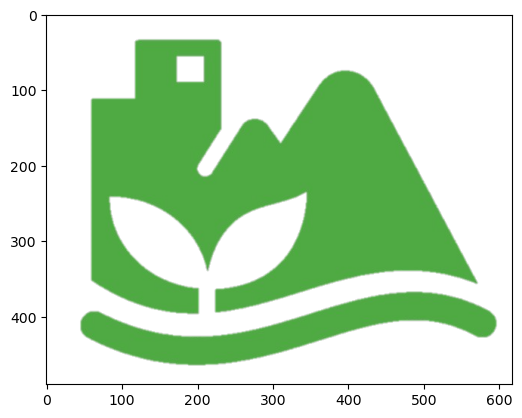

In [25]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from wordcloud import ImageColorGenerator

image_names = ['그림1.png']
# image_names = ['그림2.png']
# image_names = ['그림3.png']


for image_name in image_names:
    target_image = Image.open(image_name)
    try:
        mask = Image.new('RGB', target_image.size, (255, 255, 255))
        mask.paste(target_image, target_image)
        mask = np.array(mask)
        print("mask 변환 방식 1")
    except:
        print(image_name)
        mask = np.array(Image.open(image_name))
        print("mask 변환 방식 2")
    finally:
        plt.imshow(target_image)
        plt.show()

In [26]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont

# count = Counter(word_list)
font_path = 'NanumBarunGothic.ttf'

wc_rey = WordCloud(
    font_path = font_path,
    # mask=moon_mask,
    mask=mask,
    background_color="white"
)

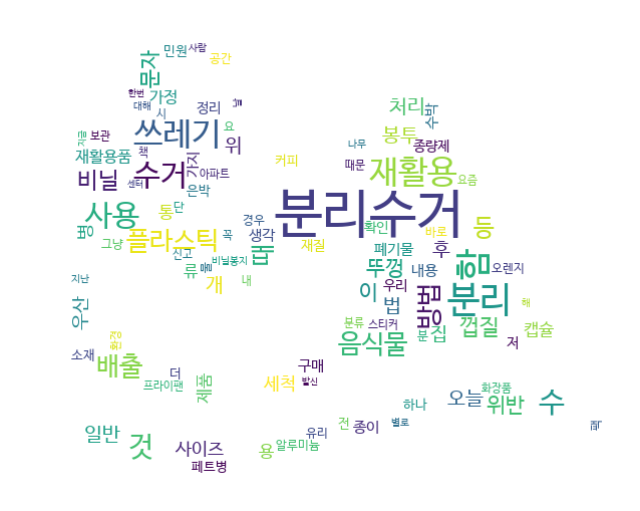

In [27]:
wc_rey = wc_rey.generate_from_frequencies(top_keywords_dict)

plt.figure(figsize=(8, 8))
plt.imshow(wc_rey, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig(f"자연어수집_wordcloud.png")
# plt.savefig(f"자연어수집_wordcloud.png", bbox_inches='tight')

---

In [19]:
reviews_df = pd.read_csv('reviews.csv')
print(reviews_df)

                                                Review
0    한눈에 쉽게 알아볼 수 있어서 쓰레기 분리 투입할 때 편합니다. 그리고 박스 2개 ...
1    주민센터 아이스팩 분리수거함 아마 가까운 관할 주민센터, 행정복지센터 방문하시면 입...
2    #음식물분리수거위반문자 #스미싱주의 #스팸문자 왓씨~아침에 눈뜨자마자 문자 잘 못 ...
3    올바르게 프라이팬 버리기 실천해 보아요~ 금속으로 된 단일 소재 캔 금속으로 분리수...
4    (대학내일 독자들 말고 교수님 어릴 때) 하지만 놀랍게도 지금, 플라스틱 공병을 모...
..                                                 ...
115  오렌지껍질 일반쓰레기 분리수거 방법 오렌지껍질 활용 오렌지는 기분 좋은 상큼함과 새...
116  분기수거를 하는 제품 가운데 옷걸이가 고민이 되는데요. 재질이 하나가 아니고 여러개...
117  먹고 분리수거는 필수!⭐️ 위치는 공영화장실 옆에 위치하고 있어요 이쪽에 있고, 여...
118  요게 지자체마다 다른 것 같은데 대충 원리는 비슷~ 제가 거주하는 마포구는 '오늘의...
119  캠핑하다보면 플라스틱, 캔, 병 등 이것저것 분리해서 쓰레기 정리해야 할 때가 많은...

[120 rows x 1 columns]


# polarity_df = pd.read_csv('polarity.csv')
# print(polarity_df)

In [ ]:
negative_keywords = polarity_df[polarity_df['max.value'] == 'NEG']['ngram'].tolist()

In [ ]:
# 전처리 함수: 리뷰 텍스트에서 불필요한 문자 제거 및 소문자 변환
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = text.lower()  # 소문자 변환
    return text

# 각 리뷰에서 부정적 키워드 추출 함수
def find_negative_keywords(review):
    tokens = preprocess_text(review).split()
    return [token for token in tokens if token in negative_keywords]

# 부정적 키워드 추출 적용
reviews_df['negative_keywords'] = reviews_df['Review'].apply(find_negative_keywords)

# 부정적 키워드를 포함한 리뷰 필터링
negative_reviews = reviews_df[reviews_df['negative_keywords'].apply(lambda x: len(x) > 0)]

# 부정적 키워드 평탄화
flat_negative_keywords = [keyword for sublist in negative_reviews['negative_keywords'] for keyword in sublist]

# 가장 빈번한 부정적 키워드 출력
negative_keywords_counts = Counter(flat_negative_keywords).most_common(10)

# 결과 출력
print("분리수거의 어려움을 나타내는 주요 키워드:", negative_keywords_counts)

# 결과 저장
# negative_reviews.to_csv('/mnt/data/negative_reviews.csv', index=False, encoding='utf-8-sig')